In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import lazypredict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from datetime import datetime, timedelta


In [27]:
p1 = 'plasma'
p2 = ['#272483', '#1E78DC']
p3 = ['#45377B', '#DED02C']
p4 = ['#DC8F95', '#645C5D']
p5 = ['#3F7185', '#E1D7C3']
p6 = ['#E51414','#EBC51D']
p7 = 'Spectral'

In [79]:
# data = pd.read_csv('data/BA_reviews - 100 reviews.csv')
# data = pd.read_csv('data/BA_reviews - 1000 reviews.csv')
data = pd.read_csv('data/BA_reviews - 3000 reviews.csv')

data

,Unnamed: 0,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews,review date
0,0,Boeing 777,NaN,Economy Class,Los Angeles to London,01-Aug-23,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | British Airways absolutely ...,1st September 2023
1,1,NaN,Couple Leisure,Economy Class,New York JFK to Malaga via London,01-Jun-23,1.0,3.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | My recent experience with B...,1st September 2023
2,2,NaN,Couple Leisure,Premium Economy,Chicago to Rome via London,01-Jul-23,3.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | This is to express our disp...,31st August 2023
3,3,A320,Solo Leisure,Business Class,London to Malaga,01-Aug-23,1.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | I flew London to Malaga on ...,30th August 2023
4,4,NaN,Solo Leisure,Economy Class,Frankfurt to London Heathrow,01-Aug-23,1.0,1.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | I arrived at the airport ab...,30th August 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,NaN,Solo Leisure,Economy Class,LHR to BUD,01-Oct-16,1.0,1.0,1.0,NaN,1.0,1,no,NaN,✅ Verified Review | London Heathrow to Budapes...,12th October 2016
1996,1996,A380,Couple Leisure,First Class,IAD to NBO via LHR,01-Sep-16,2.0,4.0,4.0,3.0,2.0,3,no,NaN,✅ Verified Review | Washington Dulles to Nair...,11th October 2016
1997,1997,A320,Family Leisure,Economy Class,AGP to LGW,01-Oct-16,2.0,4.0,1.0,NaN,4.0,1,no,NaN,✅ Verified Review | Flew Malaga to Gatwick. A...,11th October 2016
1998,1998,Boeing 777,Couple Leisure,Business Class,LGW to MRU,01-Oct-16,3.0,4.0,2.0,NaN,4.0,2,no,NaN,| We were very excited about our Club World jo...,10th October 2016


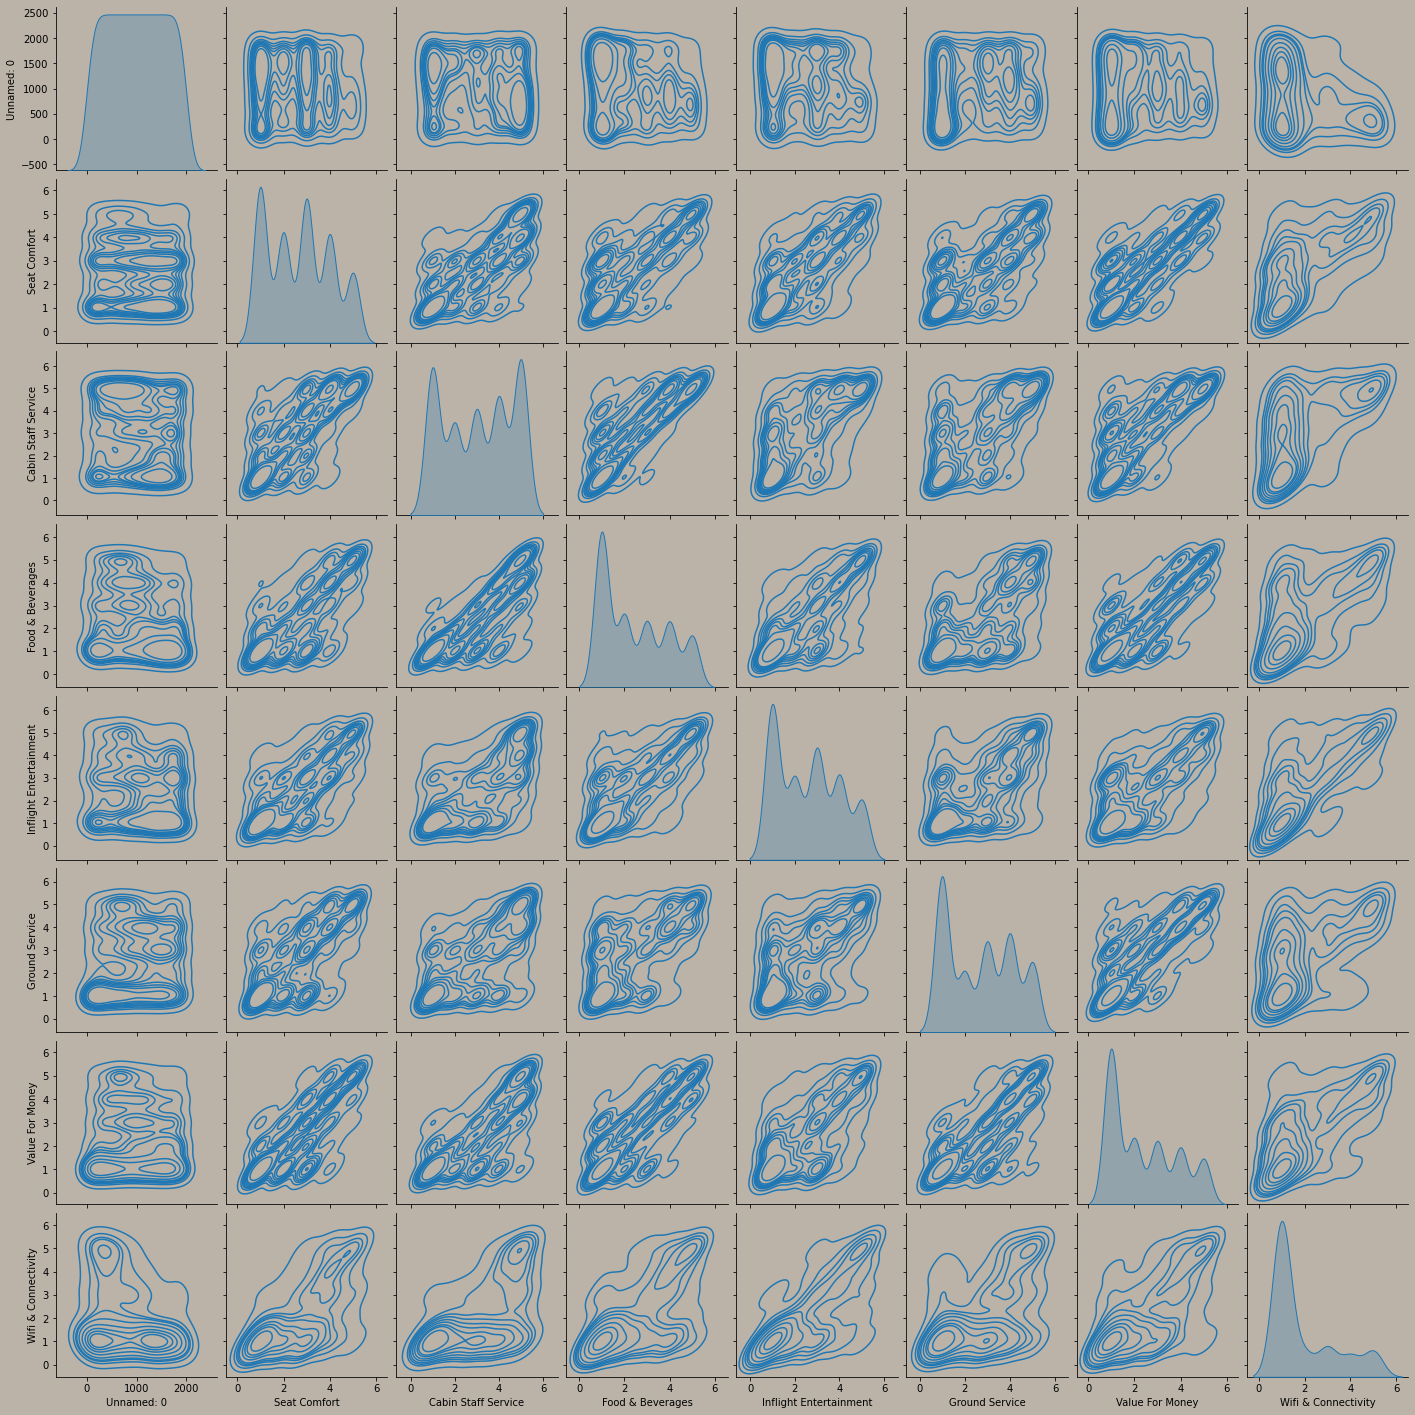

In [80]:
sns.pairplot(data, kind = 'kde')
plt.show()

In [81]:
data.columns = data.columns.str.replace("reviews", "full reviews")
data = data.drop("Unnamed: 0",axis=1)
# scraped_reviews = pd.DataFrame()
scraped_reviews = data['full reviews']

#adding a new dummy column for plotting purpose
data.insert(0, 'dummy', 0) 

data

,dummy,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,full reviews,review date
0,0,Boeing 777,NaN,Economy Class,Los Angeles to London,01-Aug-23,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | British Airways absolutely ...,1st September 2023
1,0,NaN,Couple Leisure,Economy Class,New York JFK to Malaga via London,01-Jun-23,1.0,3.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | My recent experience with B...,1st September 2023
2,0,NaN,Couple Leisure,Premium Economy,Chicago to Rome via London,01-Jul-23,3.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | This is to express our disp...,31st August 2023
3,0,A320,Solo Leisure,Business Class,London to Malaga,01-Aug-23,1.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | I flew London to Malaga on ...,30th August 2023
4,0,NaN,Solo Leisure,Economy Class,Frankfurt to London Heathrow,01-Aug-23,1.0,1.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | I arrived at the airport ab...,30th August 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,NaN,Solo Leisure,Economy Class,LHR to BUD,01-Oct-16,1.0,1.0,1.0,NaN,1.0,1,no,NaN,✅ Verified Review | London Heathrow to Budapes...,12th October 2016
1996,0,A380,Couple Leisure,First Class,IAD to NBO via LHR,01-Sep-16,2.0,4.0,4.0,3.0,2.0,3,no,NaN,✅ Verified Review | Washington Dulles to Nair...,11th October 2016
1997,0,A320,Family Leisure,Economy Class,AGP to LGW,01-Oct-16,2.0,4.0,1.0,NaN,4.0,1,no,NaN,✅ Verified Review | Flew Malaga to Gatwick. A...,11th October 2016
1998,0,Boeing 777,Couple Leisure,Business Class,LGW to MRU,01-Oct-16,3.0,4.0,2.0,NaN,4.0,2,no,NaN,| We were very excited about our Club World jo...,10th October 2016


In [82]:
# unknown = scraped_reviews[scraped_reviews.str.contains(' \|') == False].apply(lambda x: '| ' + x)
# # unknown = unknown.apply(lambda x: '| ' + x)
# unknown
# # scraped_reviews

In [83]:
'''
# df['col2'] = np.where(~(df['col2'].str.contains('%')), df['col2'] + '%', df['col2'])
# scraped_reviews = np.where(scraped_reviews.str.startswith("|"), scraped_reviews, scraped_reviews.add("| "))

# scraped_reviews['full reviews'] = np.where(~(scraped_reviews['full reviews'].str.contains('| ')), scraped_reviews['full reviews'] + '| ', scraped_reviews['full reviews'])
# scraped_reviews = scraped_reviews['full reviews']
# split_reviews = np.where(~)
unknown = scraped_reviews[scraped_reviews.str.contains('| ') == False]
unknown
# df['column_name'] = df['column_name'].apply(lambda x: x if '|' in x else x + '|')


# scraped_reviews = scraped_reviews.apply(lambda x: '| ' + x if [scraped_reviews.str.contains(' \| ') == False] else x)


'''
scraped_reviews
scraped_reviews = scraped_reviews.apply(lambda x: x if '|' in x else ' | ' + x)

scraped_reviews
split_reviews = scraped_reviews.str.replace('✅', '').str.replace('❎ ','').str.replace('Verified Review', 'Trip Verified').str.replace('Unverified ', 'Not Verified ').str.split('|',expand=True).replace('','Not Verified ') #split the review column
# print(split_reviews)

split_reviews[0] = split_reviews[0].replace(' ','').replace('','Not Verified ')
verified = split_reviews[0] #data on whether the trip is verified or not
reviews = split_reviews[1] #actual text review
# print(verified)
# print(reviews)

# print(verified.unique())
verified = verified.str.replace(' Trip Verified ', '1').str.replace('Not Verified ', '0').str.replace('Verified Review', '1').str.replace('Unverified', '0').replace(0 ,'0').replace(' ','0') #replacing string with number for easier processing
# print(verified.unique())

verified = pd.to_numeric(verified) #converting column to dtype of int for easier analysis

data['verified'] = verified
data['reviews'] = reviews

data


,dummy,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,full reviews,review date,verified,reviews
0,0,Boeing 777,NaN,Economy Class,Los Angeles to London,01-Aug-23,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | British Airways absolutely ...,1st September 2023,1,British Airways absolutely does not care. My...
1,0,NaN,Couple Leisure,Economy Class,New York JFK to Malaga via London,01-Jun-23,1.0,3.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | My recent experience with B...,1st September 2023,1,My recent experience with British Airways wa...
2,0,NaN,Couple Leisure,Premium Economy,Chicago to Rome via London,01-Jul-23,3.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | This is to express our disp...,31st August 2023,1,This is to express our displeasure and conce...
3,0,A320,Solo Leisure,Business Class,London to Malaga,01-Aug-23,1.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | I flew London to Malaga on ...,30th August 2023,1,I flew London to Malaga on 27 August in Club...
4,0,NaN,Solo Leisure,Economy Class,Frankfurt to London Heathrow,01-Aug-23,1.0,1.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | I arrived at the airport ab...,30th August 2023,1,I arrived at the airport about 2.5 hours bef...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,NaN,Solo Leisure,Economy Class,LHR to BUD,01-Oct-16,1.0,1.0,1.0,NaN,1.0,1,no,NaN,✅ Verified Review | London Heathrow to Budapes...,12th October 2016,1,London Heathrow to Budapest with British Airw...
1996,0,A380,Couple Leisure,First Class,IAD to NBO via LHR,01-Sep-16,2.0,4.0,4.0,3.0,2.0,3,no,NaN,✅ Verified Review | Washington Dulles to Nair...,11th October 2016,1,Washington Dulles to Nairobi via London. Was...
1997,0,A320,Family Leisure,Economy Class,AGP to LGW,01-Oct-16,2.0,4.0,1.0,NaN,4.0,1,no,NaN,✅ Verified Review | Flew Malaga to Gatwick. A...,11th October 2016,1,Flew Malaga to Gatwick. Although a better fl...
1998,0,Boeing 777,Couple Leisure,Business Class,LGW to MRU,01-Oct-16,3.0,4.0,2.0,NaN,4.0,2,no,NaN,| We were very excited about our Club World jo...,10th October 2016,0,We were very excited about our Club World jou...


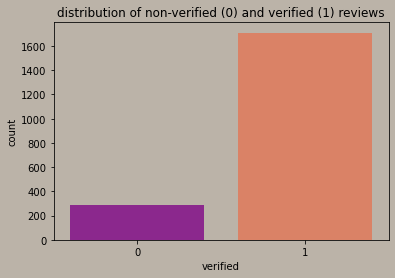

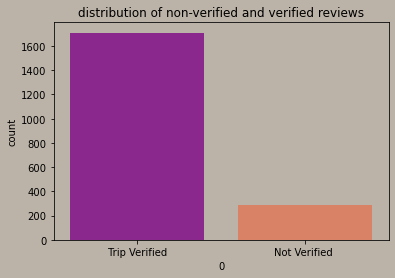

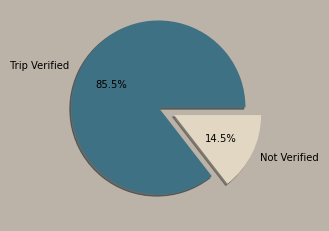

In [84]:
sns.countplot('verified', data=data, palette=p1)
plt.title('distribution of non-verified (0) and verified (1) reviews')
plt.show()

sns.countplot(split_reviews[0], palette=p1,)
plt.title('distribution of non-verified and verified reviews')
plt.show()

plt.pie(data['verified'].value_counts(), shadow=True, labels=split_reviews[0].unique(), explode = (0.2, 0), colors=p5, autopct='%1.1f%%')
plt.show()

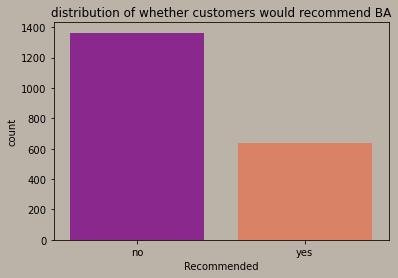

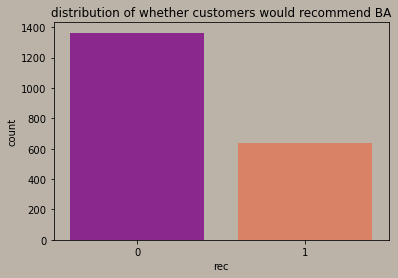

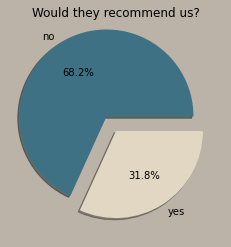

In [85]:
sns.countplot('Recommended', data=data, palette=p1)
plt.title('distribution of whether customers would recommend BA')
plt.show()

data['rec'] = data['Recommended'].replace('no', 0).replace('yes', 1)

sns.countplot('rec', data=data, palette=p1)
plt.title('distribution of whether customers would recommend BA')
plt.show()

plt.pie(data['Recommended'].value_counts(), shadow=True, labels=['no','yes'], explode = (0.2, 0), colors=p5, autopct='%1.1f%%')
plt.title('Would they recommend us?')
plt.show()

In [86]:
data['Date Flown'] = pd.to_datetime(data['Date Flown'])
data['Date Flown'] = data['Date Flown'].replace(pd.NaT, data['Date Flown'].min())
data['Date Flown']

# import datetime as dt
# # data['Date Flown'] = data['Date Flown'].apply(lambda x: dt.datetime(x,'%Y-%m') if type(x)==str else pd.NaT)

data['Date Flown'] = data['Date Flown'] + timedelta(days=14) #add 15 days so that review date is middle of month rather than 1st of month

data['review date'] = pd.to_datetime(data['review date'])
data

,dummy,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,full reviews,review date,verified,reviews,rec
0,0,Boeing 777,NaN,Economy Class,Los Angeles to London,2023-08-15,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | British Airways absolutely ...,2023-09-01,1,British Airways absolutely does not care. My...,0
1,0,NaN,Couple Leisure,Economy Class,New York JFK to Malaga via London,2023-06-15,1.0,3.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | My recent experience with B...,2023-09-01,1,My recent experience with British Airways wa...,0
2,0,NaN,Couple Leisure,Premium Economy,Chicago to Rome via London,2023-07-15,3.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | This is to express our disp...,2023-08-31,1,This is to express our displeasure and conce...,0
3,0,A320,Solo Leisure,Business Class,London to Malaga,2023-08-15,1.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | I flew London to Malaga on ...,2023-08-30,1,I flew London to Malaga on 27 August in Club...,0
4,0,NaN,Solo Leisure,Economy Class,Frankfurt to London Heathrow,2023-08-15,1.0,1.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | I arrived at the airport ab...,2023-08-30,1,I arrived at the airport about 2.5 hours bef...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,NaN,Solo Leisure,Economy Class,LHR to BUD,2016-10-15,1.0,1.0,1.0,NaN,1.0,1,no,NaN,✅ Verified Review | London Heathrow to Budapes...,2016-10-12,1,London Heathrow to Budapest with British Airw...,0
1996,0,A380,Couple Leisure,First Class,IAD to NBO via LHR,2016-09-15,2.0,4.0,4.0,3.0,2.0,3,no,NaN,✅ Verified Review | Washington Dulles to Nair...,2016-10-11,1,Washington Dulles to Nairobi via London. Was...,0
1997,0,A320,Family Leisure,Economy Class,AGP to LGW,2016-10-15,2.0,4.0,1.0,NaN,4.0,1,no,NaN,✅ Verified Review | Flew Malaga to Gatwick. A...,2016-10-11,1,Flew Malaga to Gatwick. Although a better fl...,0
1998,0,Boeing 777,Couple Leisure,Business Class,LGW to MRU,2016-10-15,3.0,4.0,2.0,NaN,4.0,2,no,NaN,| We were very excited about our Club World jo...,2016-10-10,0,We were very excited about our Club World jou...,0


In [87]:
data['date difference'] = data['review date'] - data['Date Flown']
data['date difference'] = data['date difference'].astype('str')
data['date difference'] = data['date difference'].str.replace('days','')
data['date difference'] = pd.to_numeric(data['date difference'])
data

,dummy,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,full reviews,review date,verified,reviews,rec,date difference
0,0,Boeing 777,NaN,Economy Class,Los Angeles to London,2023-08-15,1.0,1.0,1.0,1.0,1.0,1,no,NaN,✅ Trip Verified | British Airways absolutely ...,2023-09-01,1,British Airways absolutely does not care. My...,0,17
1,0,NaN,Couple Leisure,Economy Class,New York JFK to Malaga via London,2023-06-15,1.0,3.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | My recent experience with B...,2023-09-01,1,My recent experience with British Airways wa...,0,78
2,0,NaN,Couple Leisure,Premium Economy,Chicago to Rome via London,2023-07-15,3.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | This is to express our disp...,2023-08-31,1,This is to express our displeasure and conce...,0,47
3,0,A320,Solo Leisure,Business Class,London to Malaga,2023-08-15,1.0,1.0,1.0,1.0,1.0,1,no,1.0,✅ Trip Verified | I flew London to Malaga on ...,2023-08-30,1,I flew London to Malaga on 27 August in Club...,0,15
4,0,NaN,Solo Leisure,Economy Class,Frankfurt to London Heathrow,2023-08-15,1.0,1.0,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | I arrived at the airport ab...,2023-08-30,1,I arrived at the airport about 2.5 hours bef...,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,NaN,Solo Leisure,Economy Class,LHR to BUD,2016-10-15,1.0,1.0,1.0,NaN,1.0,1,no,NaN,✅ Verified Review | London Heathrow to Budapes...,2016-10-12,1,London Heathrow to Budapest with British Airw...,0,-3
1996,0,A380,Couple Leisure,First Class,IAD to NBO via LHR,2016-09-15,2.0,4.0,4.0,3.0,2.0,3,no,NaN,✅ Verified Review | Washington Dulles to Nair...,2016-10-11,1,Washington Dulles to Nairobi via London. Was...,0,26
1997,0,A320,Family Leisure,Economy Class,AGP to LGW,2016-10-15,2.0,4.0,1.0,NaN,4.0,1,no,NaN,✅ Verified Review | Flew Malaga to Gatwick. A...,2016-10-11,1,Flew Malaga to Gatwick. Although a better fl...,0,-4
1998,0,Boeing 777,Couple Leisure,Business Class,LGW to MRU,2016-10-15,3.0,4.0,2.0,NaN,4.0,2,no,NaN,| We were very excited about our Club World jo...,2016-10-10,0,We were very excited about our Club World jou...,0,-5


In [88]:
data['month'] = data['Date Flown'].dt.month
data['year'] = data['Date Flown'].dt.year


# print(data)

year_grouping = data.groupby('year', as_index=False)
# year_grouping.head()

month_grouping = data.groupby('month', as_index=False)
# month_grouping.head()

# year_grouping = data.groupby(data['Date Flown'].dt.year).mean().reset_index()
# month_grouping = data.groupby(data['Date Flown'].dt.month).mean().reset_index()

# year_grouping
# data.groupby(data['Date Flown'].dt.year).nunique()

month_grouping.mean()

,month,dummy,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,verified,rec,date difference,year
0,1,0.0,2.763314,3.325444,2.639241,2.564103,2.953216,2.558140,1.767442,0.883721,0.377907,21.924419,2019.029070
1,2,0.0,2.659574,3.049645,2.269841,2.563830,2.786207,2.500000,1.812500,0.926667,0.300000,21.246667,2018.906667
2,3,0.0,2.682635,3.048193,2.261745,2.522936,2.760234,2.173913,1.851852,0.831522,0.244565,20.266304,2019.500000
3,4,0.0,2.784810,2.930380,2.344595,2.656566,2.801242,2.366864,1.772727,0.875740,0.272189,20.562130,2019.124260
4,5,0.0,2.681818,2.987013,2.581395,2.705882,2.634615,2.353659,1.921053,0.890244,0.304878,13.932927,2019.140244
5,6,0.0,2.360947,2.827381,2.367347,2.666667,2.417143,2.110497,1.780488,0.834254,0.237569,18.414365,2019.447514
6,7,0.0,2.726027,3.027586,2.608696,2.708333,2.476190,2.380000,2.205882,0.906667,0.333333,20.533333,2019.186667
7,8,0.0,2.627907,2.961240,2.243243,2.397436,2.477612,2.231884,1.725000,0.847826,0.260870,34.543478,2018.753623
8,9,0.0,2.909774,3.287879,2.633929,2.625000,2.970149,2.720588,2.625000,0.838235,0.426471,23.102941,2018.470588
9,10,0.0,2.805405,3.167568,2.567073,2.740741,2.844920,2.626316,2.300000,0.821053,0.394737,22.889474,2018.105263


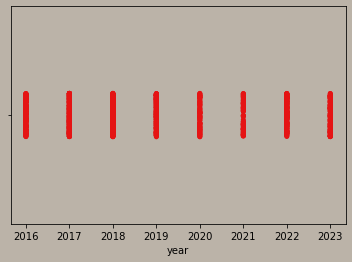

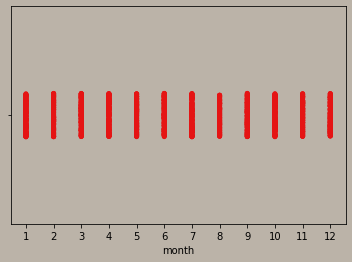

In [89]:
sns.stripplot(x=data['year'], jitter=True, palette=p6)
plt.xticks(np.arange(data['year'].min(), data['year'].max()+1,1))
plt.show()

sns.stripplot(x=data['month'],  jitter=True, palette=p6, hue=data['year'])
plt.xticks(np.arange(data['month'].min(), data['month'].max()+1,1))
plt.show()

In [90]:
ratings_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Wifi & Connectivity', 'Value For Money',
       'Recommended', 'Inflight Entertainment', 'month','year']
ratings_df = data[ratings_cols]
cols_drop = ratings_df.isna().sum().sort_values(ascending=False).head(3).reset_index()['index']
# print(cols_drop)
ratings_df = ratings_df.drop(cols_drop,axis=1)
ratings_df


,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,month,year
0,1.0,1.0,1.0,1,no,8,2023
1,1.0,3.0,1.0,1,no,6,2023
2,3.0,1.0,1.0,1,no,7,2023
3,1.0,1.0,1.0,1,no,8,2023
4,1.0,1.0,1.0,1,no,8,2023
...,...,...,...,...,...,...,...
1995,1.0,1.0,1.0,1,no,10,2016
1996,2.0,4.0,2.0,3,no,9,2016
1997,2.0,4.0,4.0,1,no,10,2016
1998,3.0,4.0,4.0,2,no,10,2016


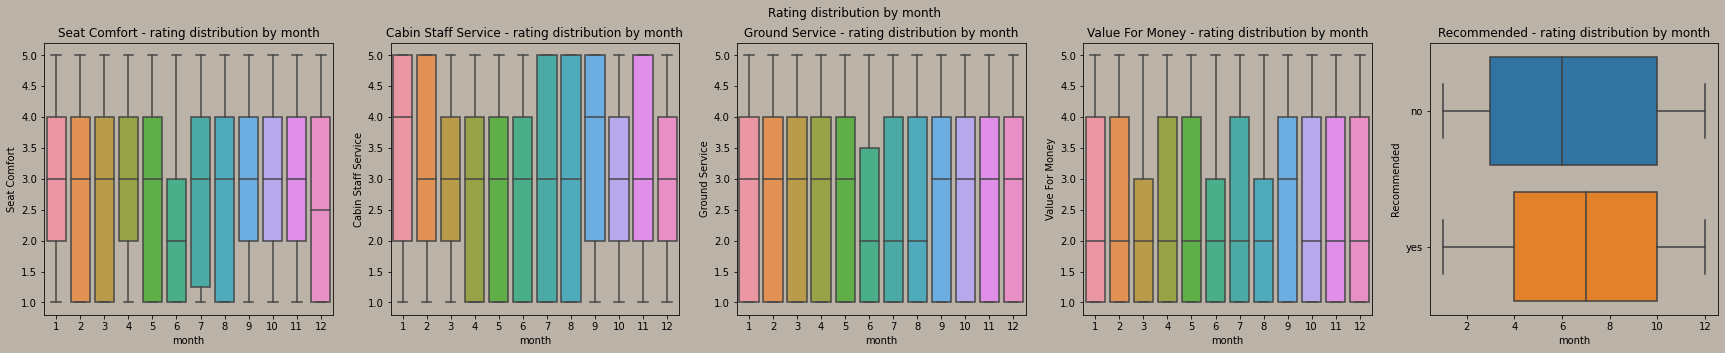

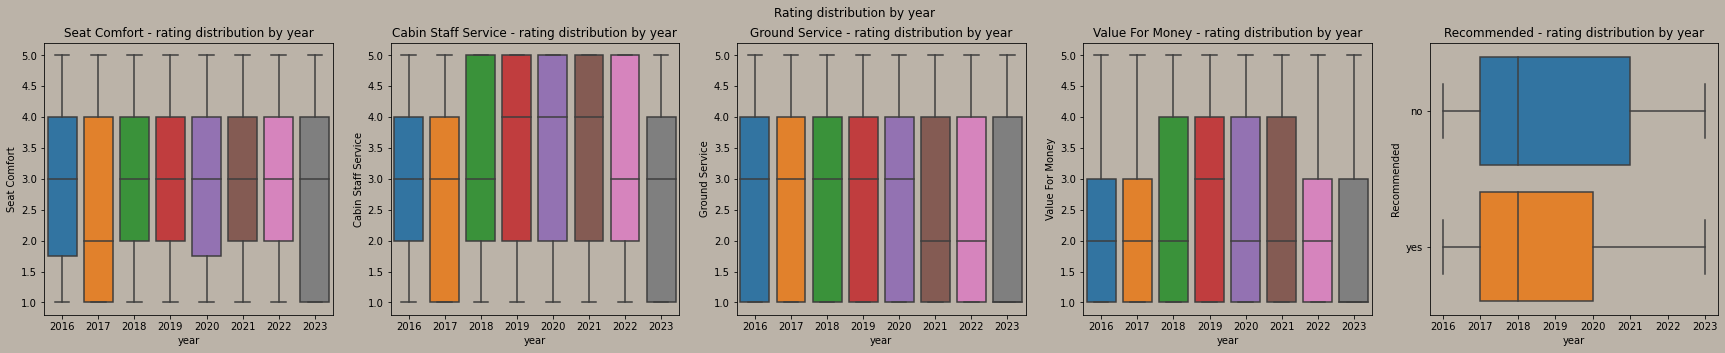

In [91]:
# ratings_df=ratings_df.fillna(ratings_df.mean())
# ratings_df_month = ratings_df.drop('year', axis=1)
# print(ratings_df.isna().sum())

f, axes = plt.subplots(ncols=len(ratings_df.columns)-2, figsize=(30,5))


for i in range(0,len(ratings_df.columns)-2):
    sns.boxplot(y=ratings_df.iloc[:,i],x=ratings_df['month'], ax=axes[i])
    axes[i].set_title(ratings_df.columns[i] + ' - rating distribution by month')
f.suptitle('Rating distribution by month')
plt.show()


f, axes = plt.subplots(ncols=len(ratings_df.columns)-2, figsize=(30,5))

for i in range(0,len(ratings_df.columns)-2):
    sns.boxplot(y=ratings_df.iloc[:,i],x=ratings_df['year'], ax=axes[i])
    axes[i].set_title(ratings_df.columns[i] + ' - rating distribution by year')
f.suptitle('Rating distribution by year')
plt.show()

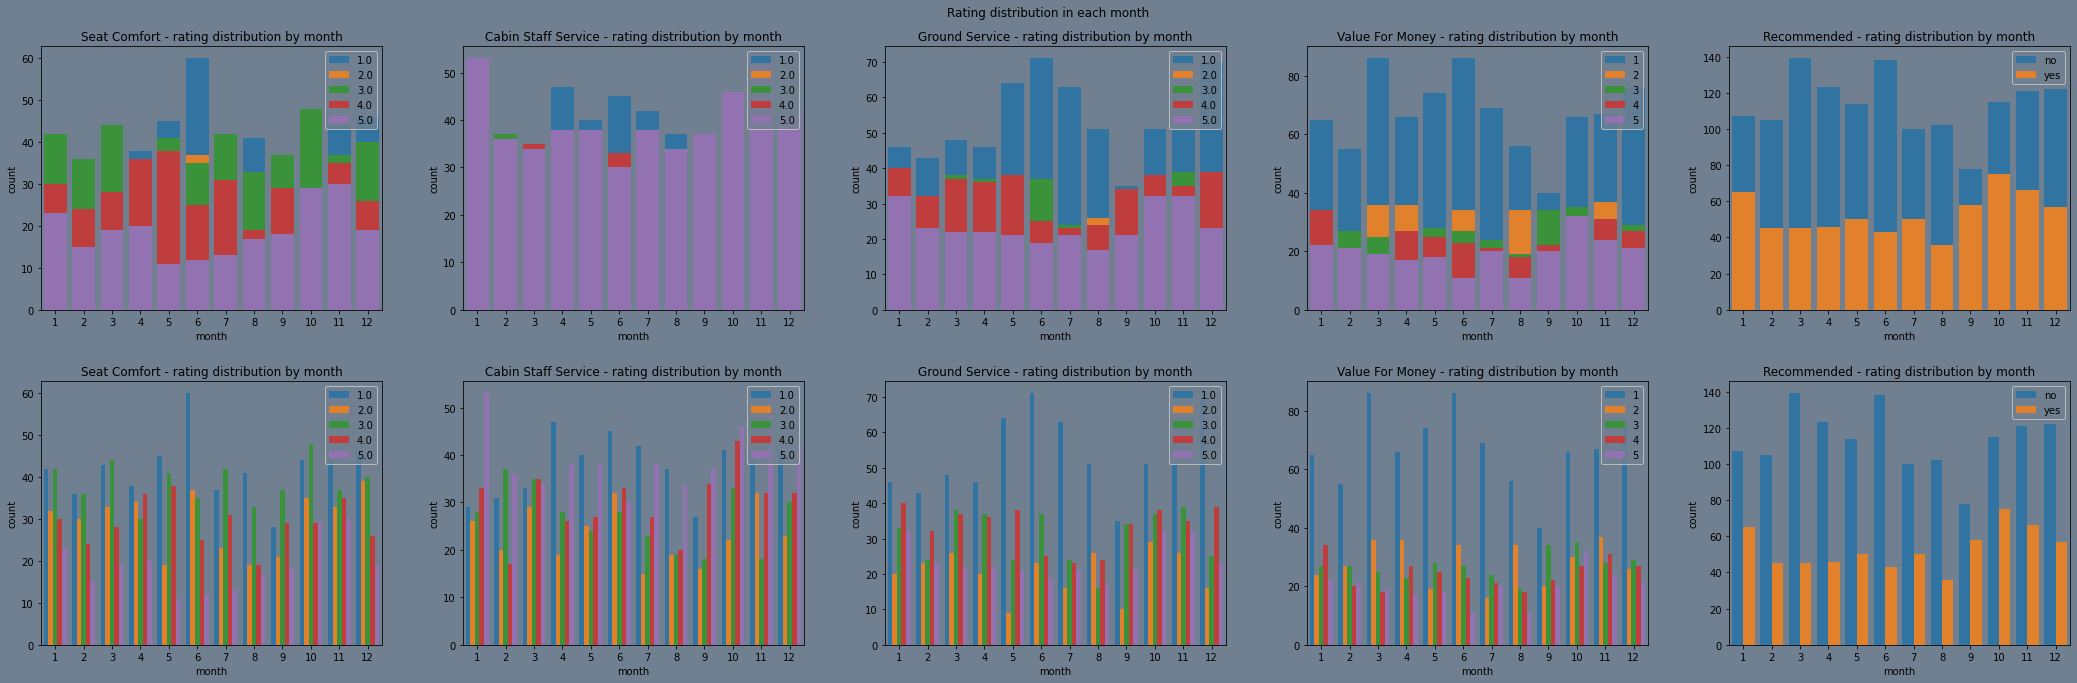

------------------------------------------------------------------------------------------------------------------------


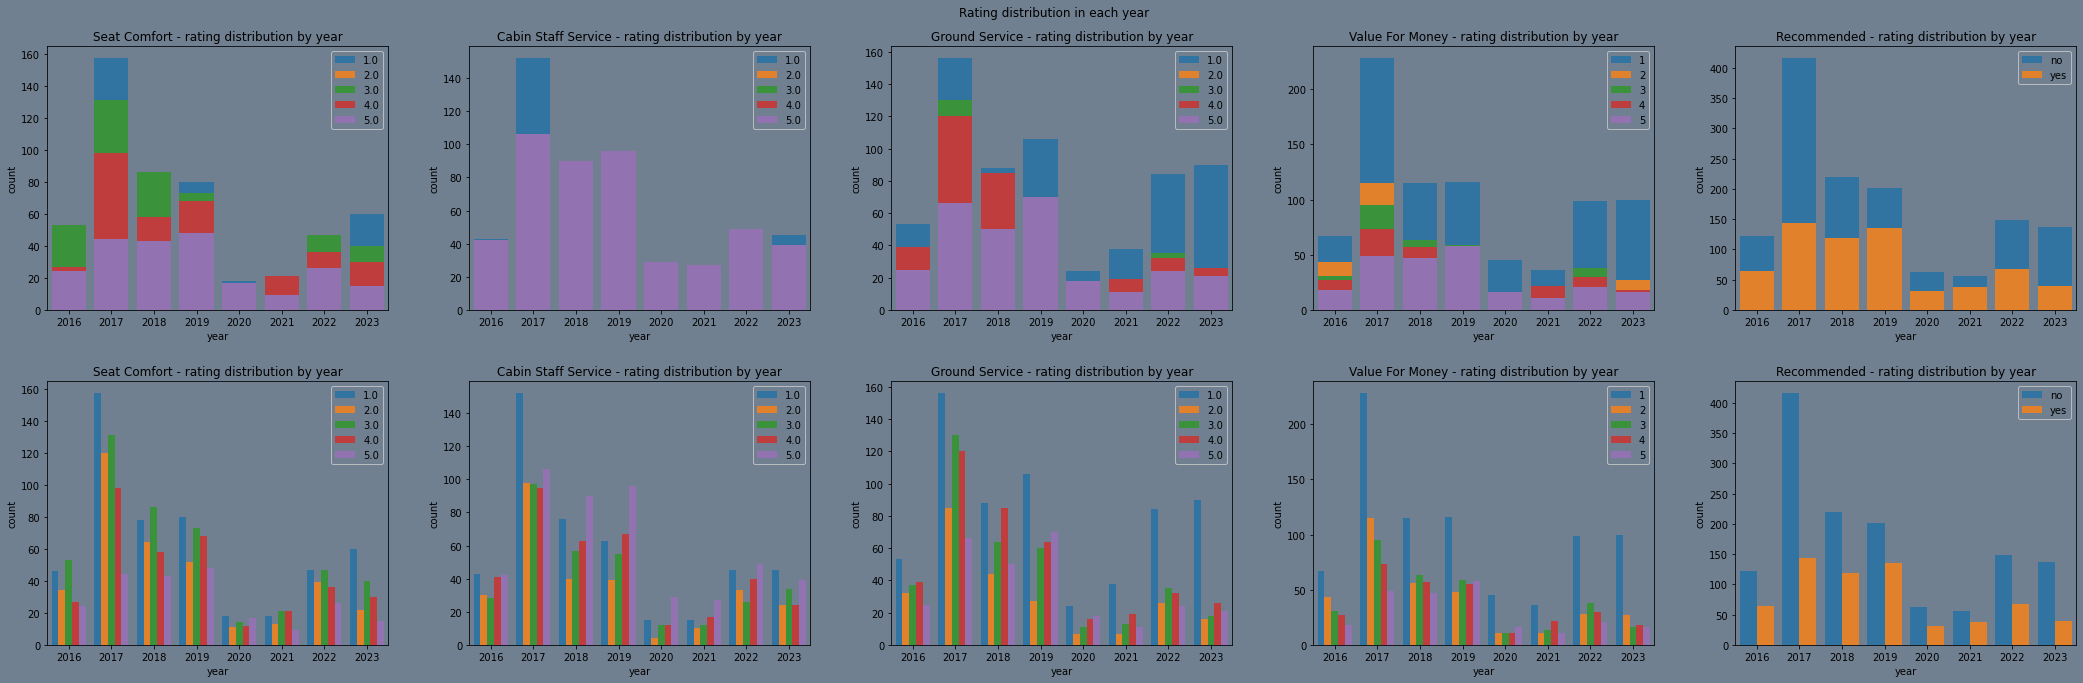

In [107]:
# plt.rcParams['axes.facecolor'] = '#708090'
# plt.rcParams['figure.facecolor'] = '#708090'

f, axes = plt.subplots(ncols=len(ratings_df.columns)-2, figsize=(30,10),nrows=2)
f.tight_layout(pad=5.0)


for i in range(0,len(ratings_df.columns)-2):
    sns.countplot(hue=ratings_df.iloc[:,i],x=ratings_df['month'], dodge=False, ax=axes[0,i])
    axes[0,i].set_title(ratings_df.columns[i] + ' - rating distribution by month')
    axes[0,i].legend(loc=1)
    sns.countplot(hue=ratings_df.iloc[:,i],x=ratings_df['month'], dodge=True, ax=axes[1,i])
    axes[1,i].set_title(ratings_df.columns[i] + ' - rating distribution by month')
    axes[1,i].legend(loc=1)
    
f.suptitle('Rating distribution in each month')
plt.show()

print('--'*60)

f, axes = plt.subplots(ncols=len(ratings_df.columns)-2, figsize=(30,10),nrows=2)
f.tight_layout(pad=5.0)



for i in range(0,len(ratings_df.columns)-2):
    sns.countplot(hue=ratings_df.iloc[:,i],x=ratings_df['year'], dodge=False, ax=axes[0,i])
    axes[0,i].set_title(ratings_df.columns[i] + ' - rating distribution by year')
    axes[0,i].legend(loc=1)
    sns.countplot(hue=ratings_df.iloc[:,i],x=ratings_df['year'], dodge=True, ax=axes[1,i])
    axes[1,i].set_title(ratings_df.columns[i] + ' - rating distribution by year')
    axes[1,i].legend(loc=1)
    
f.suptitle('Rating distribution in each year')
plt.show()

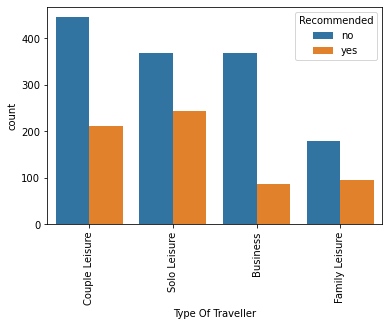

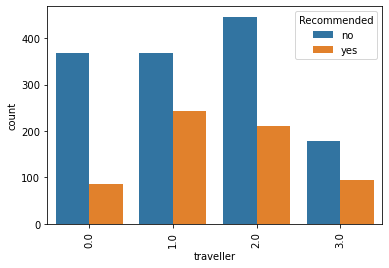

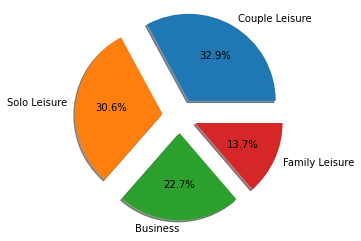

In [42]:
sns.countplot('Type Of Traveller',data=data, hue='Recommended')
plt.xticks(rotation=90)
plt.show()

data['traveller'] = data['Type Of Traveller'].replace('Business', 0).replace('Solo Leisure', 1).replace('Couple Leisure', 2).replace('Family Leisure', 3)

print("")

sns.countplot('traveller',data=data, hue='Recommended')
plt.xticks(rotation=90)
plt.show()

print("")

plt.pie(data['Type Of Traveller'].value_counts(), shadow=True, explode = (0.2, 0.2,0.2,0.2), labels=(data['Type Of Traveller'].value_counts().index), autopct='%1.1f%%')
plt.show()

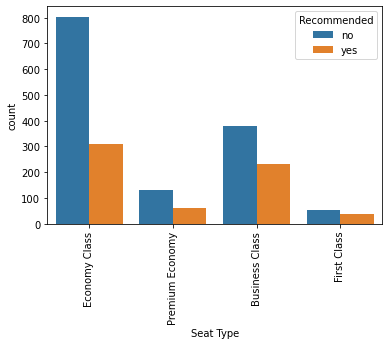

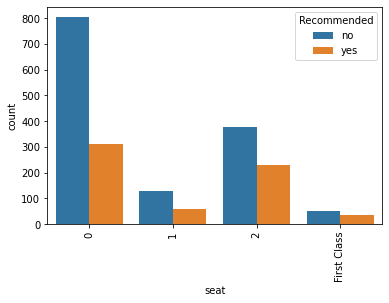

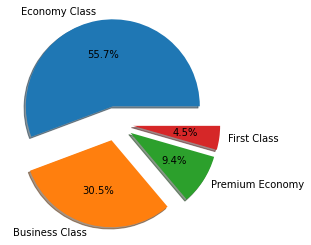

In [43]:
sns.countplot('Seat Type',data=data, hue='Recommended')
plt.xticks(rotation=90)
plt.show()

data['seat'] = data['Seat Type'].replace('Economy Class', 0).replace('Premium Economy', 1).replace('Business Class', 2)

print("")

sns.countplot('seat',data=data, hue='Recommended')
plt.xticks(rotation=90)
plt.show()

print("")

plt.pie(data['Seat Type'].value_counts(), shadow=True, explode = (0.2, 0.2,0.2, 0.2), autopct='%1.1f%%', labels=(data['Seat Type'].value_counts().index))
plt.show()

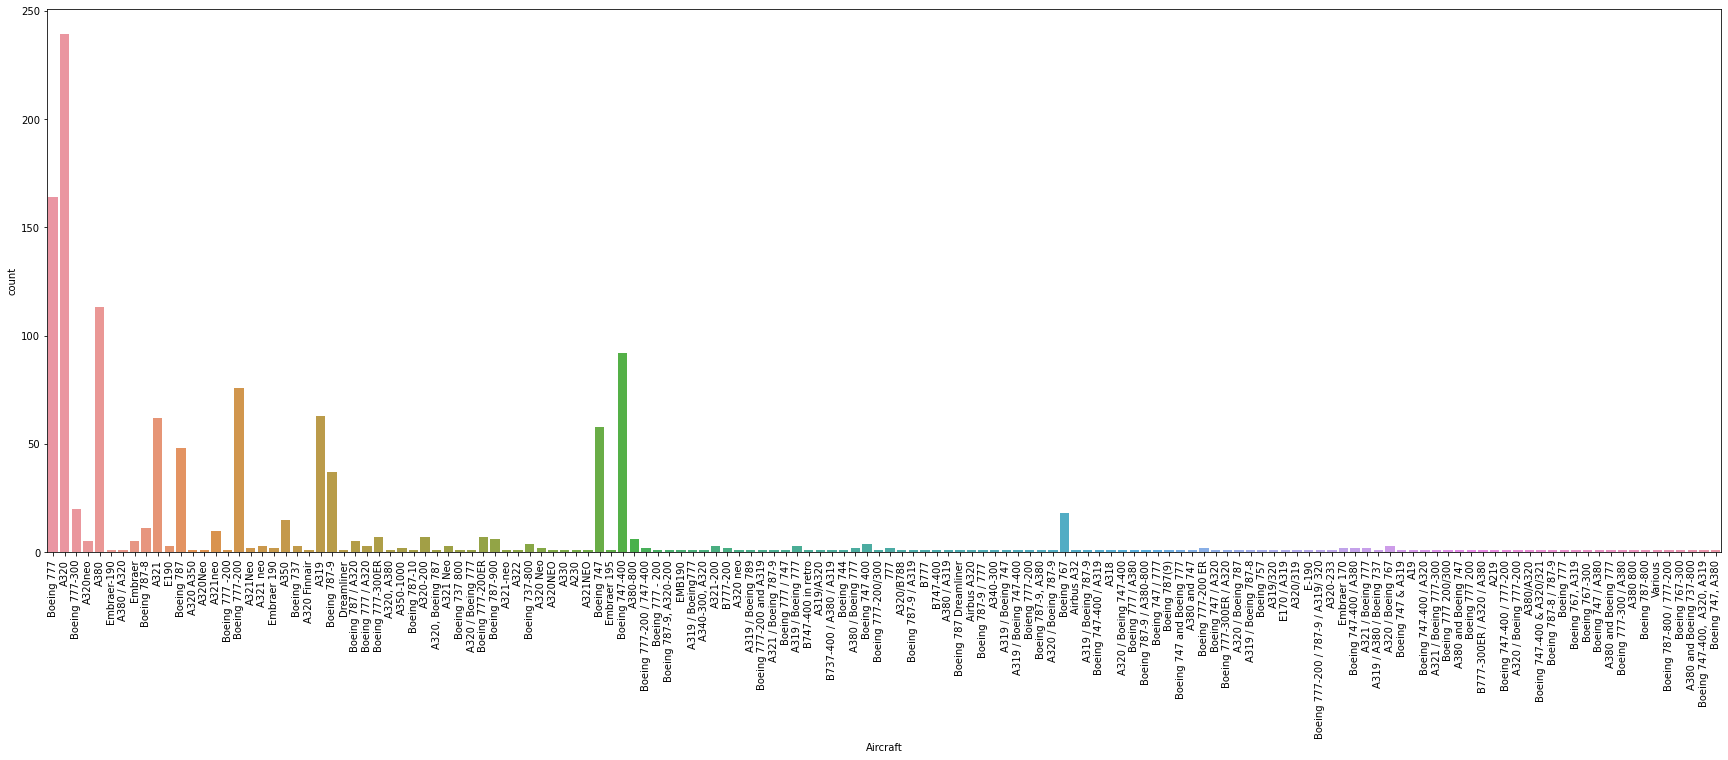

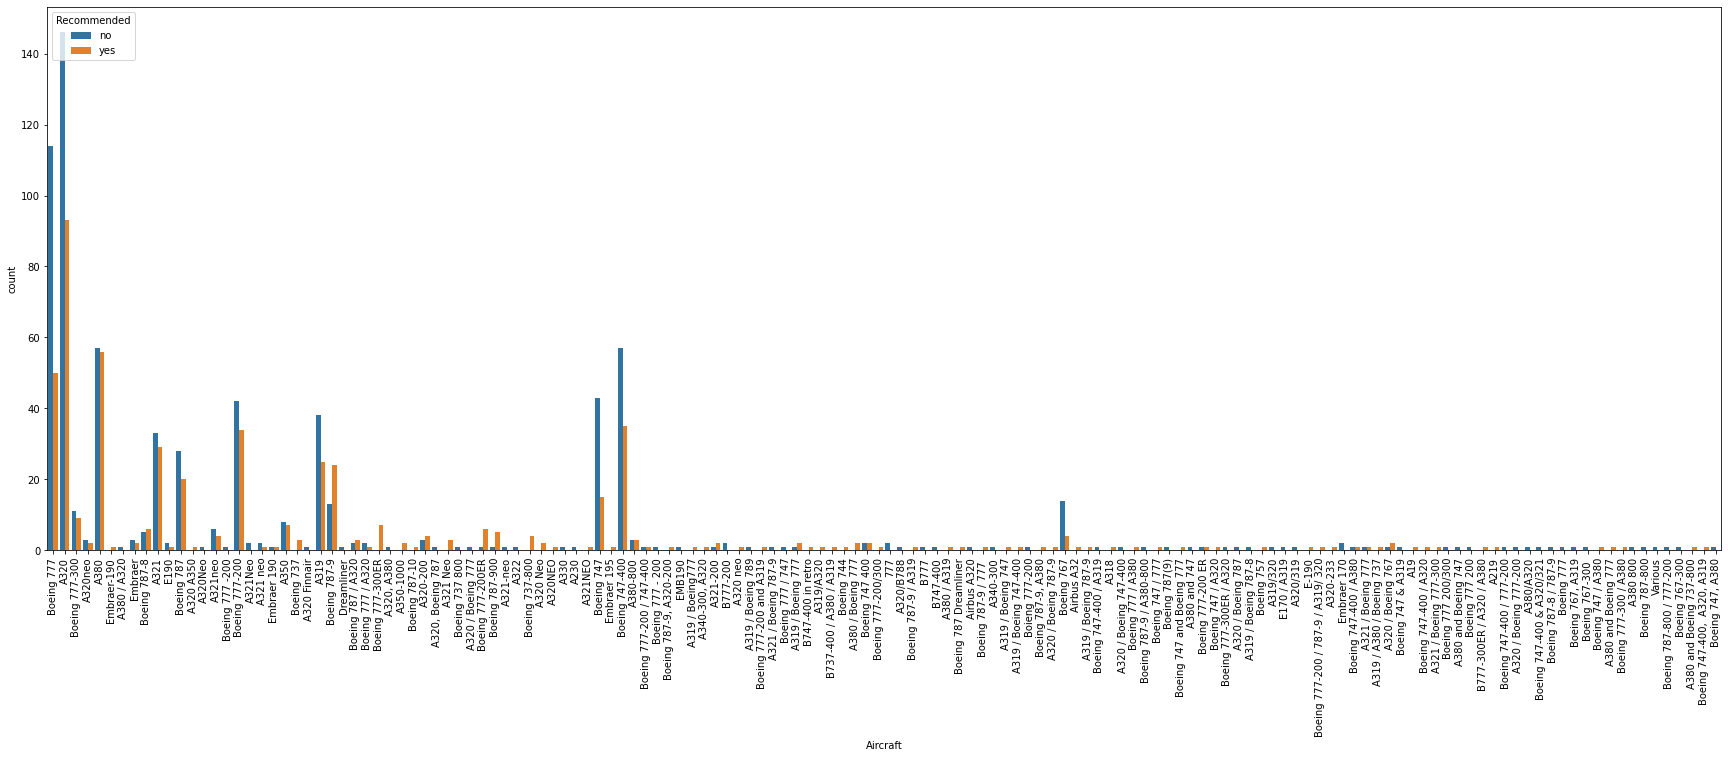

In [44]:
plt.figure(figsize=(30,10))
sns.countplot('Aircraft',data=data)
plt.xticks(rotation=90)
plt.show()

print("")

plt.figure(figsize=(30,10))
sns.countplot('Aircraft',data=data, hue='Recommended')
plt.xticks(rotation=90)
plt.show()

0              A320
1        Boeing 777
2              A380
3    Boeing 747-400
4    Boeing 777-200
Name: Aircraft, dtype: object


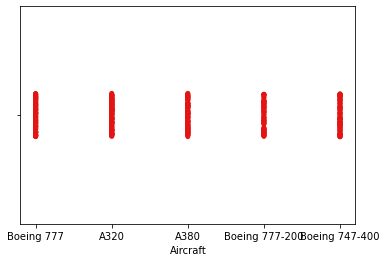

In [45]:
most_common_aircraft = (data.groupby('Aircraft').count().sort_values(ascending=False,by=['reviews']).head().reset_index())
most_common_aircraft_names = most_common_aircraft['Aircraft']
print(most_common_aircraft_names)

aircraft_grouping = data.groupby('Aircraft', as_index=False)
# print(aircraft_grouping.mean())


aircraft_dataset = data.loc[data['Aircraft'].isin(most_common_aircraft_names)]
# print(aircraft_dataset)
# print(aircraft_dataset['Aircraft'].unique())


sns.stripplot(x=aircraft_dataset['Aircraft'],  jitter=True, palette=p6)
plt.show()

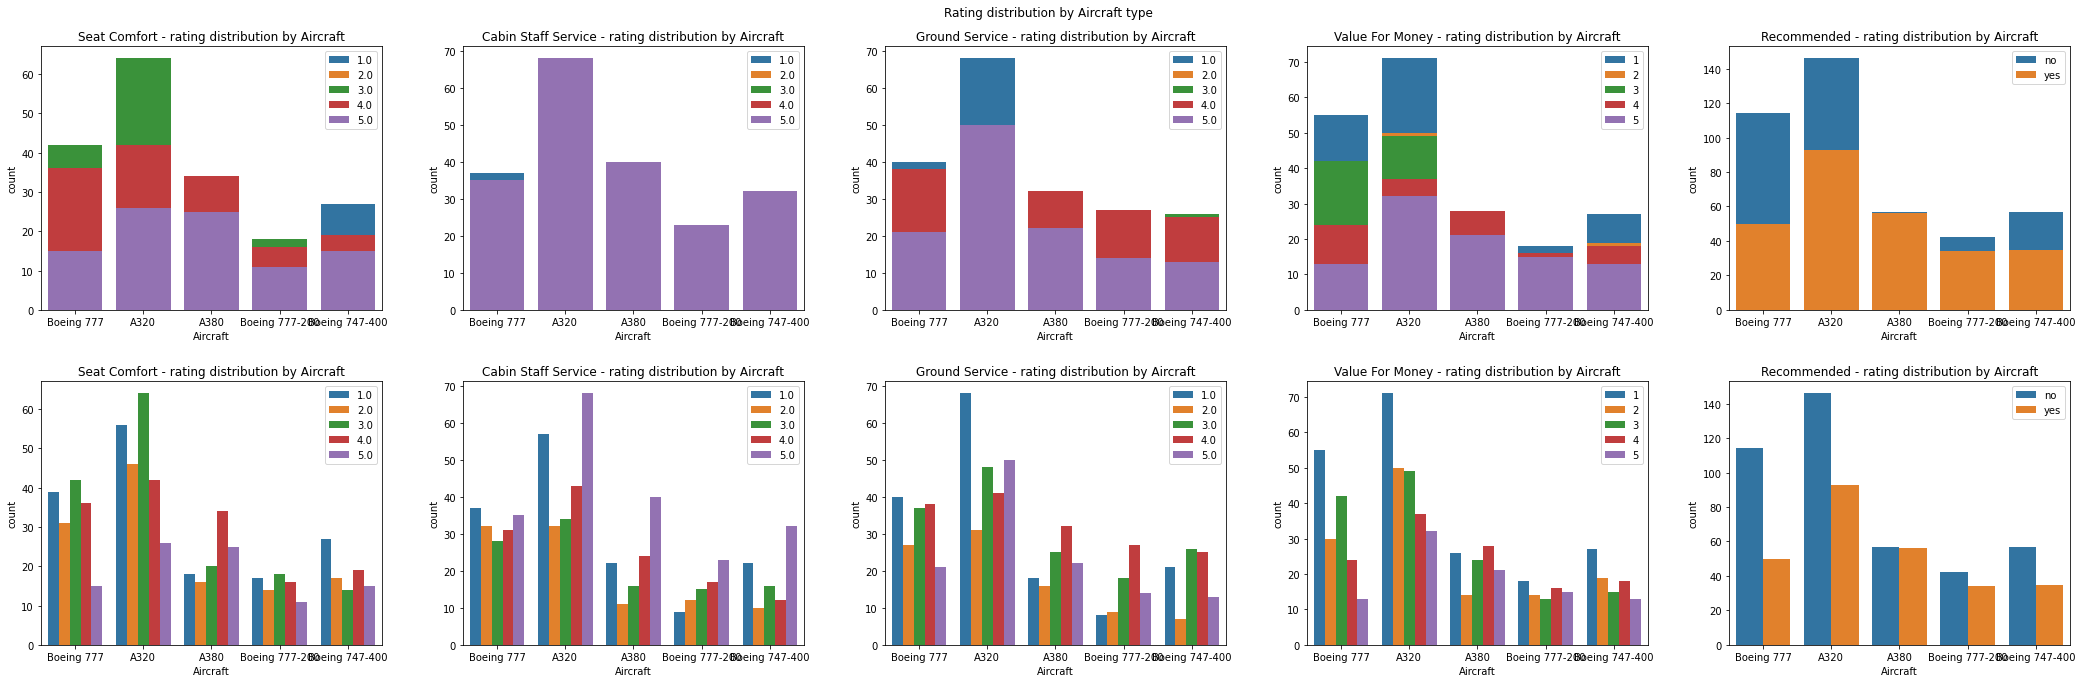

In [46]:
ratings_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Wifi & Connectivity', 'Value For Money',
       'Recommended', 'Inflight Entertainment', 'Aircraft']
ratings_df = aircraft_dataset[ratings_cols]
cols_drop = ratings_df.isna().sum().sort_values(ascending=False).drop('Aircraft').head(3).reset_index()
# print(cols_drop)
cols_drop = cols_drop['index']
# print(cols_drop)
ratings_df = ratings_df.drop(cols_drop,axis=1)
# print(ratings_df)



f, axes = plt.subplots(ncols=len(ratings_df.columns)-1, figsize=(30,10),nrows=2)
f.tight_layout(pad=5.0)


for i in range(0,len(ratings_df.columns)-1):
    sns.countplot(hue=ratings_df.iloc[:,i],x=ratings_df['Aircraft'], dodge=False, ax=axes[0,i])
    axes[0,i].set_title(ratings_df.columns[i] + ' - rating distribution by Aircraft')
    axes[0,i].legend(loc=1)
    sns.countplot(hue=ratings_df.iloc[:,i],x=ratings_df['Aircraft'], dodge=True, ax=axes[1,i])
    axes[1,i].set_title(ratings_df.columns[i] + ' - rating distribution by Aircraft')
    axes[1,i].legend(loc=1)
    
f.suptitle('Rating distribution by Aircraft type')
plt.show()

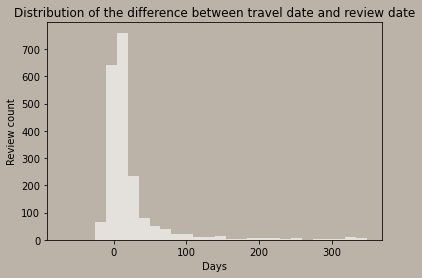

In [108]:
bins_input=(round((data['date difference'].max() - data['date difference'].min())/15))
# print(bins_input)
plt.rcParams['axes.facecolor'] = '#BBB3A8'
plt.rcParams['figure.facecolor'] = '#BBB3A8'
frequency, bins = np.histogram(data['date difference'], bins=bins_input)
plt.hist(bins[:-1], bins, weights=frequency, color='#E4E0DB')
plt.title('Distribution of the difference between travel date and review date')
plt.xlabel('Days')
plt.ylabel('Review count')
plt.show()

# plt.stairs(frequency, bins)
# plt.show()

In [48]:
# data.to_csv("data/BA_reviews - 100 reviews - cleaned.csv")
# data.to_csv("data/BA_reviews - 1000 reviews - cleaned.csv")
data.to_csv("data/BA_reviews - 3000 reviews - cleaned.csv")

print('save complete')


save complete


In [ ]:
p1 = 'plasma'
p2 = ['#272483', '#1E78DC']
p3 = ['#45377B', '#DED02C']
p4 = ['#DC8F95', '#645C5D']
p5 = ['#3F7185', '#E1D7C3']
p6 = ['#E51414','#EBC51D']
p7 = 'Spectral'

In [49]:

# fig, (ax1, ax2) = plt.subplots(1, 2)

# sns.countplot(data = year_grouping.mean(), ax=ax1)
# plt.xticks(rotation=90)

# sns.countplot(data = month_grouping.mean(), ax=ax2)
# plt.xticks(rotation=90)

# plt.show()

# dg = data.groupby(pd.Grouper(key='Date Flown', freq='M')).mean() # groupby each 1 month
